In [2]:
import pandas as pd

In [3]:
employee = pd.read_csv('employee.csv')

In [4]:
employee = employee.drop(['EmployeeCount','EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [5]:
employee['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [6]:
employee.loc[employee['Attrition']=='No', 'Attrition']=0
employee.loc[employee['Attrition']=='Yes', 'Attrition']=1

In [7]:
employee['Attrition'].unique()

array([1, 0])

In [8]:
employee.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [9]:
import numpy as np
employee_num =employee[employee.select_dtypes(include=[np.number]).columns.tolist()]
employee_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
DailyRate                   1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
PercentSalaryHike           1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StockOptionLevel            1470 non-null int64
TotalWorkingYears           1470 non-null int64
TrainingTimesLastYear       1

In [10]:
employee_dummies =employee.select_dtypes(include=['object'])

employee_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 7 columns):
BusinessTravel    1470 non-null object
Department        1470 non-null object
EducationField    1470 non-null object
Gender            1470 non-null object
JobRole           1470 non-null object
MaritalStatus     1470 non-null object
OverTime          1470 non-null object
dtypes: object(7)
memory usage: 80.5+ KB


In [11]:
employee_dummies =pd.get_dummies(employee_dummies)

In [12]:
employee_dummies.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [13]:
employee_combined = pd.concat([employee_num,employee_dummies], axis=1)

In [14]:
employee_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1

In [15]:
employee_combined.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_y = employee_combined['Attrition']

In [18]:
train_x = employee_combined.drop(['Attrition'], axis = 1)

In [19]:
x_train,x_test,y_train , y_test = train_test_split(train_x, train_y, test_size = 0.3, random_state = 20)

In [20]:
from sklearn import tree

In [21]:
dt = tree.DecisionTreeClassifier() # creating decision tree object

In [22]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
y_pred = dt.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [25]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)

In [26]:
#computing the model performance matrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Accuracy :', accuracy)
print('f1 :', f1)
print('precision :', precision)
print('recall :', recall)
print('roc_auc :', roc_auc)

Accuracy : 0.7959183673469388
f1 : 0.375
precision : 0.36486486486486486
recall : 0.38571428571428573
roc_auc : 0.6295148247978437


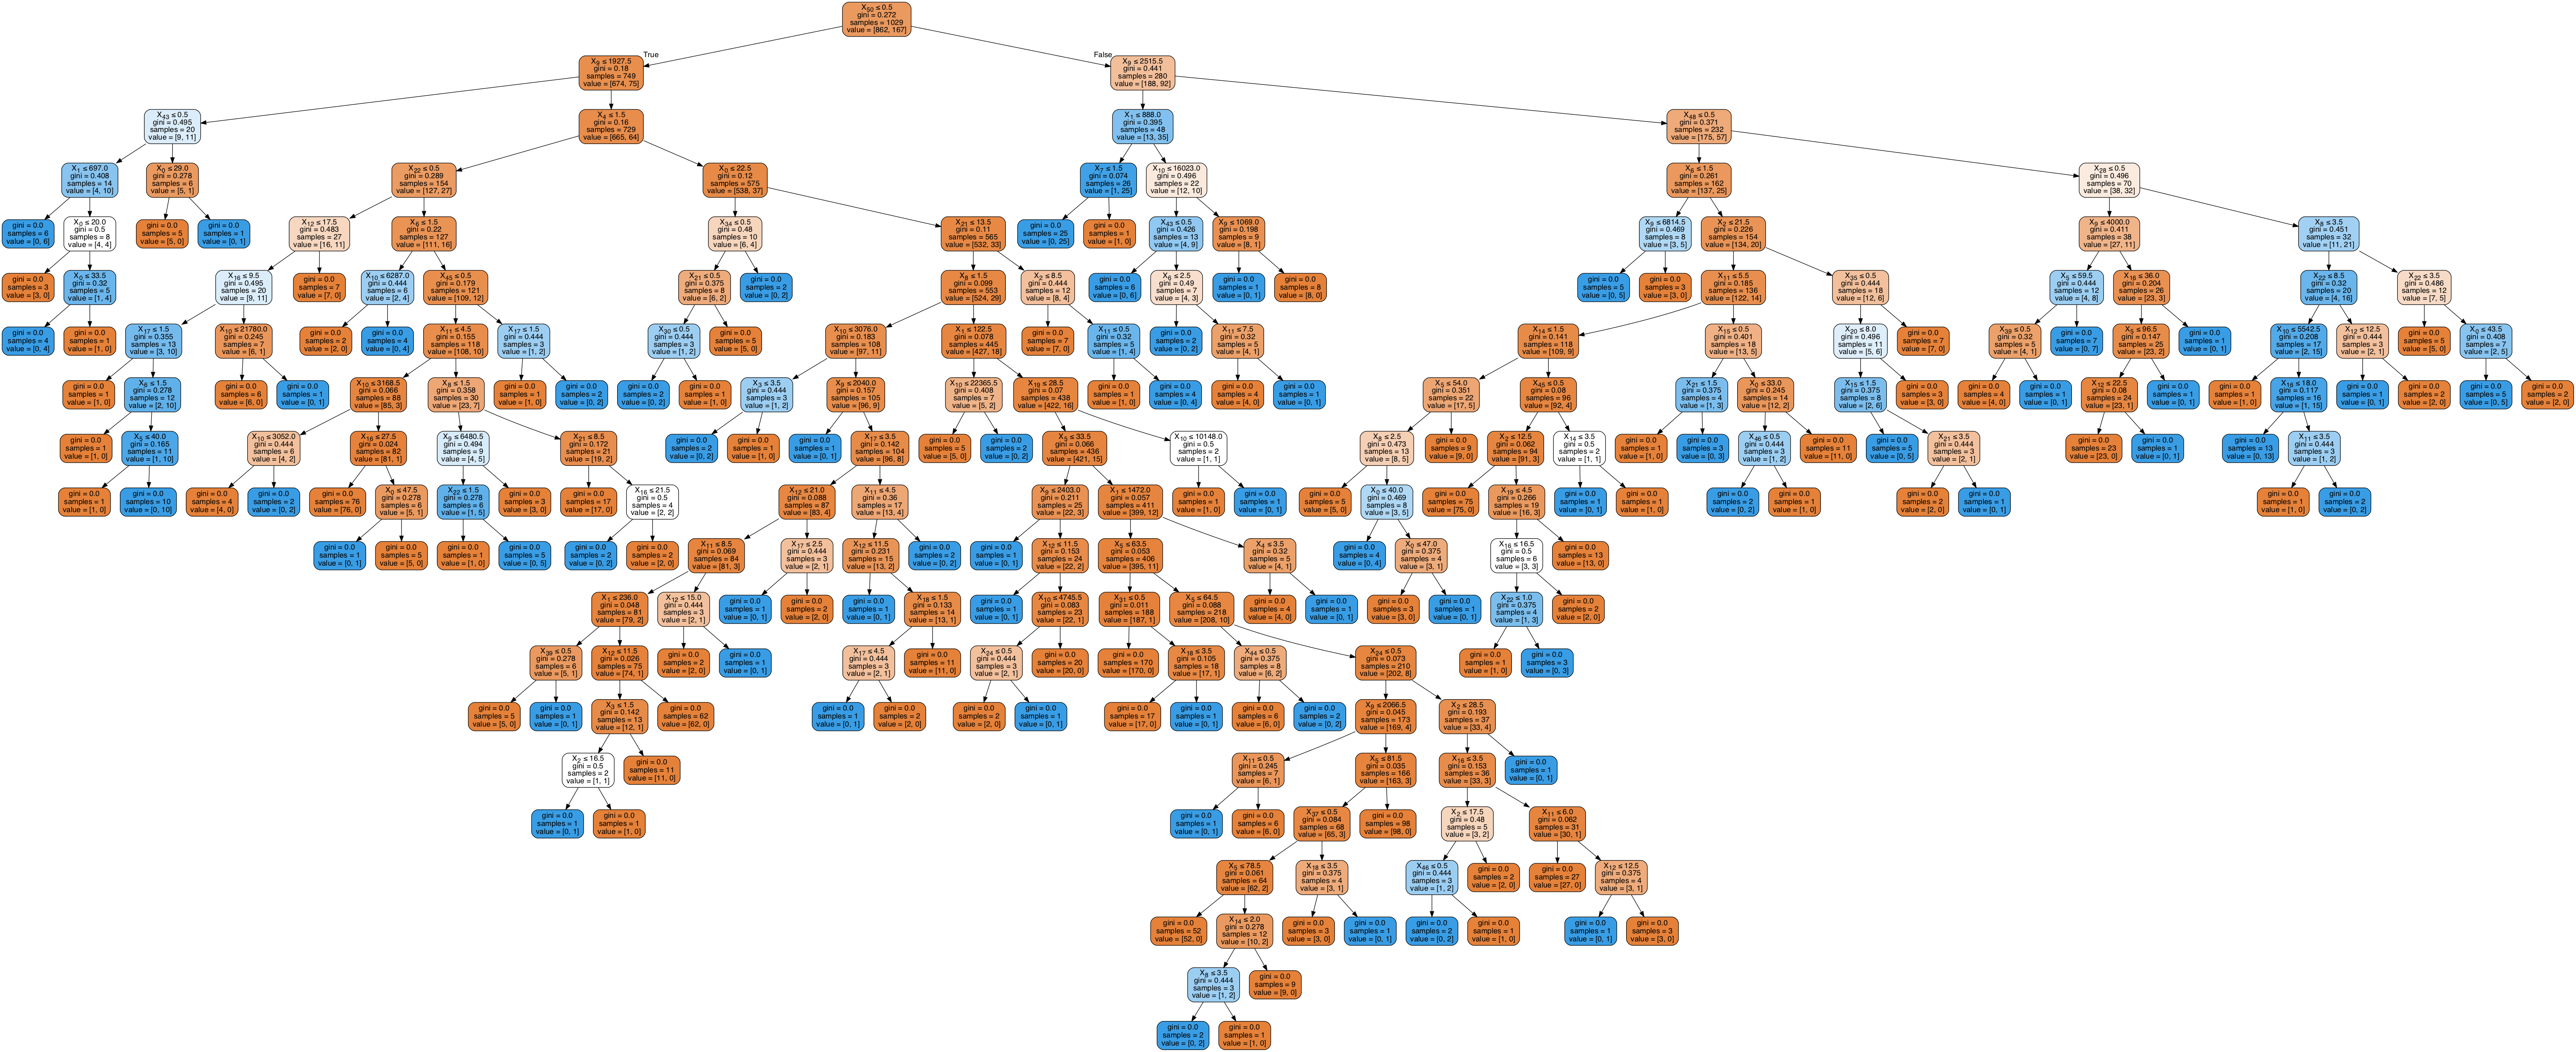

In [27]:
import graphviz

from sklearn.externals.six import StringIO

from sklearn.tree import export_graphviz

import pydotplus

dot_data=StringIO()

from IPython.display import Image

dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, filled=True, rounded=True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())